# Estimação(Cap8) - Pense Estatística, $2^o$ Edição.

## Universidade Federal de Alagoas - UFAL
## Centro de Tecnologia - CTEC
## Programa de Pós-Graduação Recursos Hídricos e Saneamento - PPGRHS
### Disciplina de Estatística

Clebson Farias

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
import estimation

In [3]:
#Dados Manso
dados = pd.read_csv("manso.csv", index_col=0, parse_dates=True)
dados.head()

,1455008,66231000,MANSO
Date,,,
1981-07-12,0.0,90.928,NaN
1981-07-13,0.0,94.663,NaN
1981-07-14,0.0,93.413,NaN
1981-07-15,0.0,92.168,NaN
1981-07-16,0.0,92.168,NaN


## O jogo da estimação

In [4]:
#Deleta todas as linhas com valor NaN
dados_naturais = dados.MANSO.dropna(axis=0, how='all')
dados_naturais.head()

Date
1982-01-01    243.0
1982-01-02    329.0
1982-01-03    290.0
1982-01-04    300.0
1982-01-05    386.0
Name: MANSO, dtype: float64

![](boxplot.png)

In [5]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return df[trueList]

dados_less_outliers = remove_outlier(dados_naturais)
mean_less_outliers = dados_less_outliers.mean()
print("Média sem outilers: ", mean_less_outliers)

Média sem outilers:  154.70311926605504


- $\bar{x}$ é uma escolha para estimar $\mu$;
- Este processo é chamado de estimação;

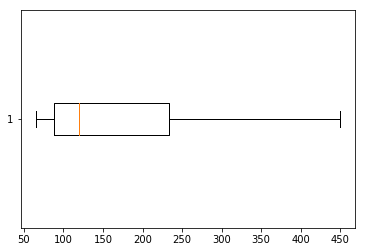

<Figure size 576x432 with 0 Axes>

In [6]:
thinkplot.BoxPlot(x=dados_naturais, vert=False, showfliers=False)
thinkplot.Show()

In [7]:
#Média dos dados
mean = dados_naturais.mean()
print('Vazão Média: ', mean)

Vazão Média:  188.55886379192333


- $\bar{x}$ é uma boa alternativa para estimar $\mu$ quando a amostra não apresenta outliers;
- Alternativas quando a amostra apresenta outliers:
 - Uma é descartar os outliers;
 - Outra é usar a mediana;

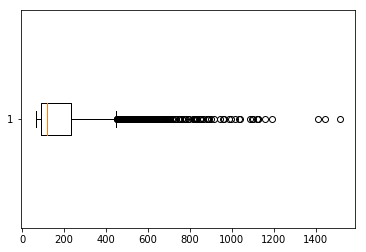

<Figure size 576x432 with 0 Axes>

In [8]:
#BoxPlot com outliers
thinkplot.BoxPlot(x=dados_naturais, vert=False)
thinkplot.Show()

- O melhor estimador depende da circunstância;
 - Se existe outliers;
 - Depende do objetivo;
   - Diminuir erros;
   - Chance de obter a resposta certa;
- Se não houver outliers, $\bar{x}$ minimiza o erro médio quadrático ($MSE$):

$MSE = \frac{1}{m} \sum (\bar{x} − \mu)^{2}$

Onde:
- $m$ é o número de iteração;
- $\bar{x}$ é a média da amostra;
- $\mu$ é a média estimada da amostra;

In [9]:
# A função Estimate1 usa a distribuição normal;
sigma = dados_less_outliers.std()
mean = dados_less_outliers.mean()

estimation.Estimate1(mu = mean, sigma = sigma, n = 25, m = 1000)

Experiment 1
rmse xbar 17.8934637506507
rmse median 22.393872165947858


- Performance para 2 estimadores;
- Isso confirma que $\bar{x}$ minimiza o $MSE$;
- Dependendo do objetivo, minimizar o $MSE$ não é a melhor estratégia:
- Em alguns casos podemos usar o método de máxima verossimilhança ($MLE$) para aumentar a chance de obter a resposta certa; 

## Achar a variância

- $S^{2}$ é uma escolhar para estimar $\sigma^{2}$;

$S^{2} = \frac{1}{n} \sum (x_{i} - \bar{x})^{2}$

- $S^{2}$ é adequado para amostra grande;
- $S^{2}$ para amostra pequena, tende a ser baixo;
    - Conhecido como estimador tendencioso;
- Um estimador não é tendencioso quando o ser erro total, depois de muitas iterações, for 0;
- Existe outra estatística não tendenciosa para estimar $\sigma^{2}$;

$S_{n-1}^{2} = \frac{1}{n-1} \sum (x_{i} - \bar{x})^{2}$

In [10]:
# A função Estimate1 usa a distribuição normal;
sigma = dados_less_outliers.std()
mean = dados_less_outliers.mean()

estimation.Estimate2(mu = mean, sigma = sigma, n = 100, m = 1000)

Experiment 2
mean error biased -91.71924347423594
mean error unbiased -10.844691774186911


- MeanError calcula a diferença médiaa entre o valor real e o valor estimado;
- Ser tendencioso é uma propriedade do estimador;

## Distribuições de amostragem

- Variação na estimativa causada pela seleção aleatória é chamada erro de amostragem.

In [11]:
mu=mean
sigma=sigma 
n=15
m=1000

estimation.SimulateSample(mu, sigma, n, m)

standard error 23.54933302175667
confidence interval (117.677333185491, 193.95085185440436)
Writing estimation1.pdf
Writing estimation1.png


<Figure size 576x432 with 0 Axes>

![](estimation1.png)

- Distribuição Normal;
- Distribuição amostral do estimador;
- Duas maneiras mais comuns de resumir uma distribuição amostral;
    - Erro padrão (SE): é a medida média que esperamos que o estimador seja;
    - Intervalo de confiança (CI): é o intervalo que inclue uma parte da distribuição;
- Erro padrão é frequentemente confundido com desvio padrão;
- Intervalo de confiança e erro padrão são usados para quantificar erro de amostragem;
- A distribuição amostral não leva em conta outros tipos de erros;

## Viés de amostragem

- É um proplema causado através das propriedades do processo de seleção:
    - Dependendo do processo de seleção escolhido, podemos viesar a amostra;

## Distribuições exponenciais

- A média da distribuição exponencial é: $\frac{1}{\lambda}$
- $L$ é um estimador de $\lambda$

$L = \frac{1}{\bar{x}}$

- Se $\bar{x}$ é robusto na presença de outliers, espera-se que $L$ tenha o mesmo problema;
- Uma outra alternativa é a mediana, onde a médiana é: $\frac{ln(2)}{m}$;

$L_{m} = \frac{ln(2)}{m}$

Onde:
- $m$ é a mediana da amostra

In [16]:
mu=mean
n=30
m=1000

estimation.Estimate3(mu, n, m)

Experiment 3
rmse L 29.369472871129748
rmse Lm 43.24212790093949
mean error L 3.51096961935182
mean error Lm 5.973395946511111
